In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [3]:
#Q2
# Configure API key 
quandl.ApiConfig.api_key = 'baeg2g8PjdBtq6MWg7Pn'

In [4]:
# Importing the World Bank Data
data = quandl.get_table('WB/DATA')

In [5]:
data.rename(columns = {'country_name': 'COUNTRY'}, inplace=True)

In [6]:
data.head()

,series_id,country_code,COUNTRY,year,value
None,,,,,
0,VC.PKP.TOTL.UN,XKX,Kosovo,2017,17.0
1,VC.PKP.TOTL.UN,XKX,Kosovo,2016,14.0
2,VC.PKP.TOTL.UN,XKX,Kosovo,2015,16.0
3,VC.PKP.TOTL.UN,XKX,Kosovo,2014,16.0
4,VC.PKP.TOTL.UN,XKX,Kosovo,2013,14.0


In [7]:
data.columns

Index(['series_id', 'country_code', 'COUNTRY', 'year', 'value'], dtype='object')

In [8]:
df = pd.read_csvdf = pd.read_csv(r'C:\Users\Lore\12.2020ProiectCursDA\6 Covid Economies\df.csv', index_col = False)

In [9]:
df = pd.read_csv(r'C:\Users\Lore\12.2020ProiectCursDA\6 Covid Economies\df.csv', index_col = False)

In [10]:
path = r'C:\Users\Lore\12.2020ProiectCursDA'

In [11]:
path

'C:\\Users\\Lore\\12.2020ProiectCursDA'

In [12]:
merge = data.merge(df, on = 'COUNTRY', how = 'outer', indicator = True)

In [13]:
merge["_merge"].value_counts()

both          1747575
right_only       7624
left_only        2908
Name: _merge, dtype: int64

In [14]:
merge_2 = merge[merge["_merge"] == "both"]

In [15]:
merge_2["_merge"].value_counts()

both          1747575
left_only           0
right_only          0
Name: _merge, dtype: int64

In [16]:
merge_2.head()

,series_id,country_code,COUNTRY,year,value,Unnamed: 0,CODE,CITY,CONTINENT,EU,DATE,HDI,TC,TD,STI,Population,GDPCAP,_merge
0,VC.PKP.TOTL.UN,XKX,Kosovo,2017.0,17.0,24903.0,OWID_KOS,Pristina,Europe,No,3/14/2020,0.0,0.693147,0.0,4.279717,14.474467,9.189712,both
1,VC.PKP.TOTL.UN,XKX,Kosovo,2017.0,17.0,24904.0,OWID_KOS,Pristina,Europe,No,3/15/2020,0.0,1.609438,0.0,4.444884,14.474467,9.189712,both
2,VC.PKP.TOTL.UN,XKX,Kosovo,2017.0,17.0,24905.0,OWID_KOS,Pristina,Europe,No,3/16/2020,0.0,2.564949,0.0,4.444884,14.474467,9.189712,both
3,VC.PKP.TOTL.UN,XKX,Kosovo,2017.0,17.0,24906.0,OWID_KOS,Pristina,Europe,No,3/17/2020,0.0,2.772589,0.0,4.444884,14.474467,9.189712,both
4,VC.PKP.TOTL.UN,XKX,Kosovo,2017.0,17.0,24907.0,OWID_KOS,Pristina,Europe,No,3/18/2020,0.0,2.944439,0.0,4.444884,14.474467,9.189712,both


In [17]:
merge_2.drop(["Unnamed: 0"], axis=1, inplace = True)

In [18]:
merge_2.head()

,series_id,country_code,COUNTRY,year,value,CODE,CITY,CONTINENT,EU,DATE,HDI,TC,TD,STI,Population,GDPCAP,_merge
0,VC.PKP.TOTL.UN,XKX,Kosovo,2017.0,17.0,OWID_KOS,Pristina,Europe,No,3/14/2020,0.0,0.693147,0.0,4.279717,14.474467,9.189712,both
1,VC.PKP.TOTL.UN,XKX,Kosovo,2017.0,17.0,OWID_KOS,Pristina,Europe,No,3/15/2020,0.0,1.609438,0.0,4.444884,14.474467,9.189712,both
2,VC.PKP.TOTL.UN,XKX,Kosovo,2017.0,17.0,OWID_KOS,Pristina,Europe,No,3/16/2020,0.0,2.564949,0.0,4.444884,14.474467,9.189712,both
3,VC.PKP.TOTL.UN,XKX,Kosovo,2017.0,17.0,OWID_KOS,Pristina,Europe,No,3/17/2020,0.0,2.772589,0.0,4.444884,14.474467,9.189712,both
4,VC.PKP.TOTL.UN,XKX,Kosovo,2017.0,17.0,OWID_KOS,Pristina,Europe,No,3/18/2020,0.0,2.944439,0.0,4.444884,14.474467,9.189712,both


In [19]:
#Q3
data.shape

(10000, 5)

In [17]:
merge_2.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1750473, 1750474, 1750475, 1750476, 1750477, 1750478, 1750479,
            1750480, 1750481, 1750482],
           dtype='int64', length=1747575)

In [21]:
type(merge_2)

pandas.core.frame.DataFrame

In [65]:
# Plot the data using matplotlib.
# plt.figure(figsize=(15,5), dpi=100)
# plt.plot(merge_2)
# It is not working because I merged the datasets but in my original dataset "df" I have DATE (but is daily) and in the new dataset "data" I have year (is not daily). So.. the dataset is not good so I can't make subset after merging.

In [18]:
df.head()

,Unnamed: 0,CODE,COUNTRY,CITY,CONTINENT,EU,DATE,HDI,TC,TD,STI,Population,GDPCAP
0,0,AFG,Afghanistan,Kabul,Asia,No,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754
1,1,AFG,Afghanistan,Kabul,Asia,No,1/1/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
2,2,AFG,Afghanistan,Kabul,Asia,No,1/2/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
3,3,AFG,Afghanistan,Kabul,Asia,No,1/3/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
4,4,AFG,Afghanistan,Kabul,Asia,No,1/4/2020,0.498,0.0,0.0,0.0,17.477233,7.497754


In [19]:
df.drop(["Unnamed: 0", "CODE", "COUNTRY", "CITY", "CONTINENT", "EU"], axis=1, inplace = True)

In [20]:
df.head()

,DATE,HDI,TC,TD,STI,Population,GDPCAP
0,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754
1,1/1/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
2,1/2/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
3,1/3/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
4,1/4/2020,0.498,0.0,0.0,0.0,17.477233,7.497754


In [21]:
#Q3 
# Reset index so that you can use the "Date" column as a filter
df_2 = df.reset_index()

In [22]:
df_2.head()

,index,DATE,HDI,TC,TD,STI,Population,GDPCAP
0,0,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754
1,1,1/1/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
2,2,1/2/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
3,3,1/3/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
4,4,1/4/2020,0.498,0.0,0.0,0.0,17.477233,7.497754


In [23]:
# convert the 'Date' column to datetime format
df_2['DATE']= pd.to_datetime(df_2['DATE'])

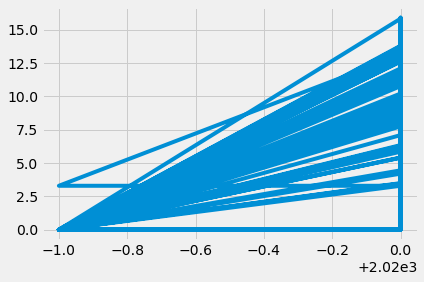

In [62]:
#plt.plot(df_2['DATE'], df_2['DATE'].dt.to_period('M').groupby(({'TC'['mean']})))

#df_2['DATE'].dt.to_period('M').values
plt.plot(df_2['DATE'].dt.year, df_2['TC'])

In [30]:
data_sub = df_2.loc[(df_2['DATE'] >= '09/01/2020') & (df_2['DATE'] < '09/30/2020')]

In [31]:
data_sub.shape

(6003, 8)

In [32]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['DATE']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['DATE'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,index,HDI,TC,TD,STI,Population,GDPCAP
datetime,,,,,,,
2020-09-01,245,0.498,10.550486,7.248504,3.058707,17.477233,7.497754
2020-09-02,246,0.498,10.550722,7.248504,3.058707,17.477233,7.497754
2020-09-03,247,0.498,10.551716,7.250636,3.058707,17.477233,7.497754
2020-09-04,248,0.498,10.552892,7.251345,3.058707,17.477233,7.497754
2020-09-05,249,0.498,10.553310,7.251345,3.058707,17.477233,7.497754


I selected september 2020 to see how bad was Covid, after 10 months.

In [61]:
df.to_csv(os.path.join(path, '6 Covid Economies', 'data_sub.csv'))

In [62]:
data_sub = pd.read_csv(r'C:\Users\Lore\12.2020ProiectCursDA\6 Covid Economies\data_sub.csv', index_col = False)

In [63]:
path = r'C:\Users\Lore\12.2020ProiectCursDA'

In [64]:
path

'C:\\Users\\Lore\\12.2020ProiectCursDA'

In [73]:
from platform import python_version
print(python_version())

3.7.9


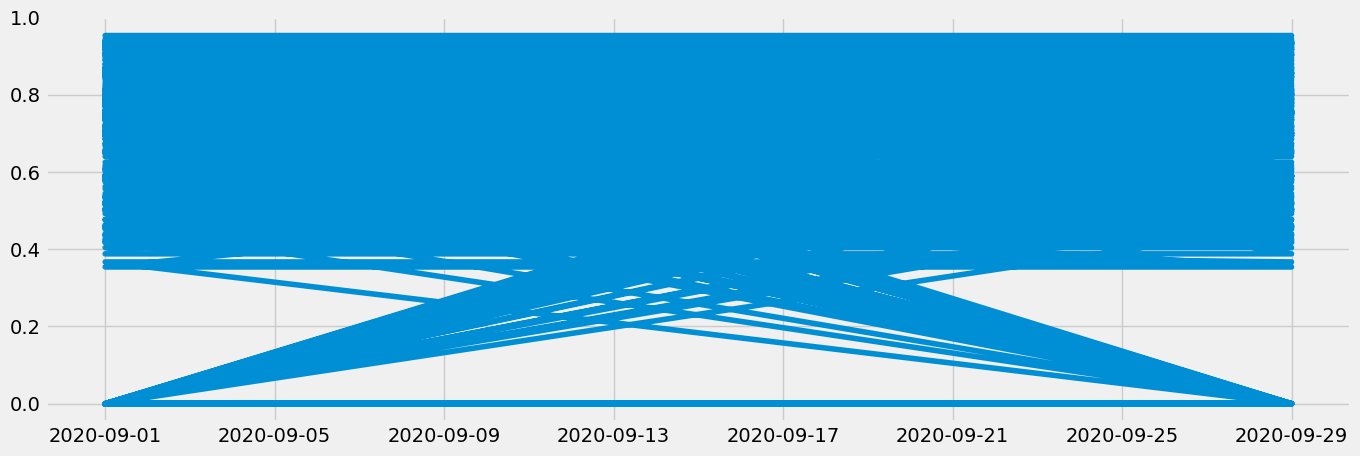

In [37]:
#Q4
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub["HDI"])

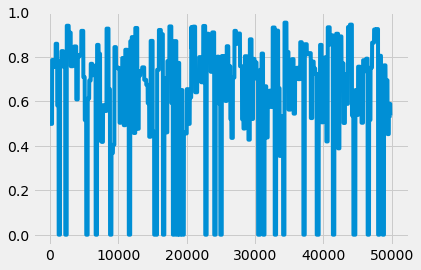

In [65]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('data_sub.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series["HDI"].plot()
pyplot.show()

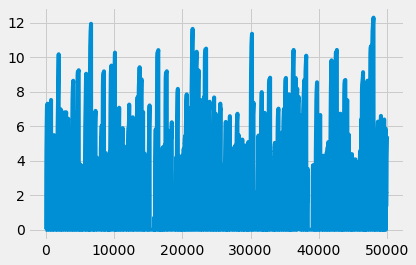

In [48]:
series = read_csv('df.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series["TD"].plot()
pyplot.show()

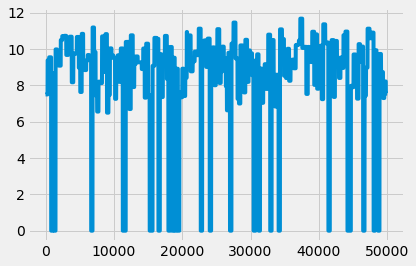

In [49]:
series = read_csv('df.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series["GDPCAP"].plot()
pyplot.show()

In [64]:
#Q5
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(df_2, model='additive')

#why this does not work? .... Can you open the example

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
# Ok, seems this will take longer - let me review this tonight /oktmorrow morning and let you know. I will do on your file in my notebook
#You please continue your study, ok? ok Thanks!!!  HAve  a nice evening! :) You too! Sorry no poblem!!! Have a nice day, see you yes! you tpoo

In [67]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

In [68]:
# Plot the separate components
decomposition.plot()
plt.show()

NameError: name 'decomposition' is not defined

In [70]:
#Q6
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['TD'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.667681e+01
p-value                        1.528301e-29
Number of Lags Used            1.700000e+01
Number of Observations Used    4.997300e+04
Critical Value (1%)           -3.430481e+00
Critical Value (5%)           -2.861598e+00
Critical Value (10%)          -2.566801e+00
dtype: float64


ValueError: could not convert string to float: '12/31/2019'

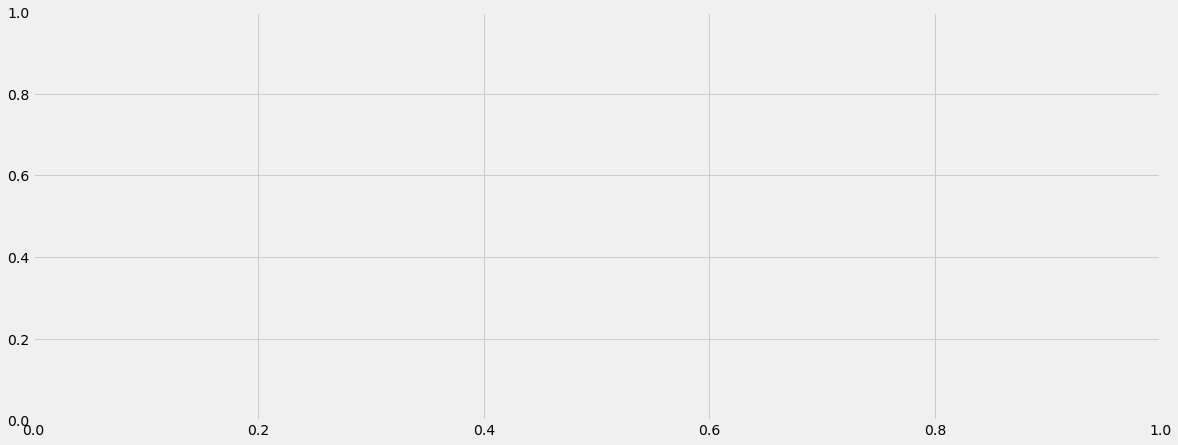

In [71]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

In [72]:
#Q7
data_diff = data_sub - data_sub.shift(1) 

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
data_diff.dropna(inplace = True)

In [ ]:
data_diff.head()

In [ ]:
data_diff.columns

In [ ]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [ ]:
dickey_fuller(data_diff)

In [ ]:
plot_acf(data_diff)
plt.show()

In [ ]:
#Q9
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()